In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import utils

# Setting random seeds to get reproducible results
np.random.seed(0)
tf.random.set_seed(1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

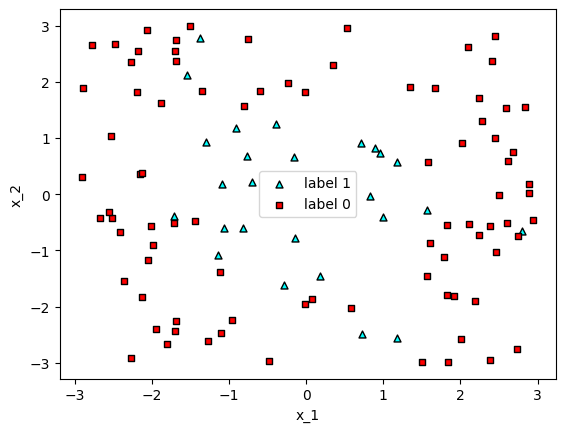

In [18]:
# Loading the one_circle dataset

df = pd.read_csv('one_circle.csv', index_col=0)
x = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
utils.plot_points(x,y)

In [11]:
from keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x, categorized_y, epochs=100, batch_size=1)

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 0.2602 - accuracy: 0.9000
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9182
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8727
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8909
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9091
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8636
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8909
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9000
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8818
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2699 - accura

50/50 [==============================] - 0s 2ms/step


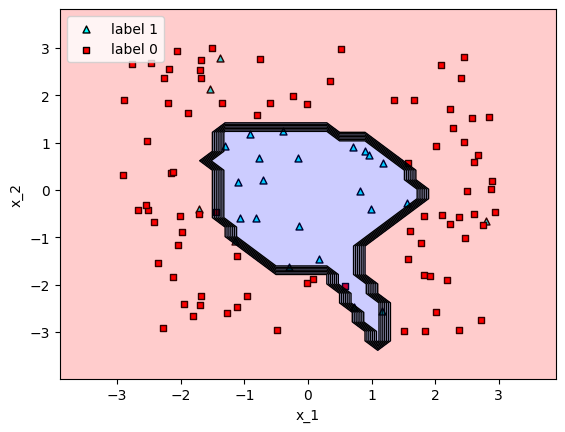

In [22]:
utils.plot_model(x, y, model)